In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.datasets import mnist

from my_ai_utils import *

In [2]:
import matplotlib.pyplot as plt
def test(model, test_images, test_labels):
    # Prédictions sur quelques images
    predictions = model.predict(test_images)

    # Afficher quelques images avec leurs prédictions
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.xlabel(f'Predicted: {tf.argmax(predictions[i])}, True: {tf.argmax(test_labels[i])}')
    plt.show()

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images = train_images / 255.0
#test_images = test_images / 255.0
train_labels = Processing.one_hot_encode(train_labels)
test_labels = Processing.one_hot_encode(test_labels)
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000, 10)


In [4]:
#np.random.seed(42)
model1 = Sequential(usage=Usage.multiClassification)
model1.add_layer(Flatten(input_shape=(28, 28)))
#model1.add_layer(BatchNormalization(28*28))
model1.add_layer(Dense(28*28, 128, activation="reLu"))
#model1.add_layer(BatchNormalization(128))
model1.add_layer(Dense(128, 16, activation="reLu"))
#model1.add_layer(BatchNormalization(16))
model1.add_layer(Dense(16, 10, activation="softmax", classes=[_ for _ in range(10)]))

#dense1_w = copy.deepcopy([model1.layers[1].kernel, model1.layers[1].biases])
#dense2_w = copy.deepcopy([model1.layers[2].kernel, model1.layers[2].biases])
#dense3_w = copy.deepcopy([model1.layers[3].kernel, model1.layers[3].biases])

# learning_rate schedulers
lr = CosineDecay(initial_lr=0.2, alpha=0.001, warmup=True, warmup_steps=100, hold_steps=200)
# lr = ExponentialDecay(initial_lr=0.2, decay_rate=0.2, warmup=True, warmup_steps=100, hold_steps=100)
# Adam(0.9, 0.999, lr=0.001)
model1.compile(loss_fn=Loss("categorical_cross_entropy"), optimizer=Adam(lr=lr))
print("Initial for dense", model1.layers[-1].kernel[0])
# model1.summary()

#model.cross_validate(k=3, train_X=train_images, train_Y=Processing.one_hot_encode(train_labels), nepochs=5, batch_size=256)
#model.show_lr_evolution()

Initial for dense [-0.43478209 -0.12611834  0.08216363  0.17331934  0.25237505  0.28053142
 -0.0742897  -0.08310351 -0.08595115  0.04118273]


In [5]:
### Reference test Tensorflow models
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#model2.layers[1].set_weights(dense1_w)
#model2.layers[2].set_weights(dense2_w)
#model2.layers[3].set_weights(dense3_w)

# Compiler le modèle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model2.summary()

print("Initial for dense ", model2.layers[3].get_weights()[0][0])

# Évaluer le modèle sur l'ensemble de test
# test_loss, test_acc = model2.evaluate(test_images, test_labels)
# print('Test accuracy:', test_acc)

Initial for dense  [-0.37538603 -0.01097381  0.34389555  0.2931546  -0.3033921  -0.05092794
  0.46776664  0.34701073 -0.17453447 -0.45469892]


In [6]:
# Entraîner le modèle
history = model2.fit(train_images, train_labels, epochs=5, batch_size=32)
#print("After ", model2.layers[3].get_weights()[0][0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1621 - accuracy: 0.2160
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8934 - accuracy: 0.2657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7699 - accuracy: 0.3085
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3947 - accuracy: 0.4103
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0763 - accuracy: 0.5474


In [7]:
model1.train(train_images, train_labels, nepochs=5, batch_size=32)
#print("After for dense", model1.layers[-1].kernel[0])

Training data dimensions:  (47999, 28, 28)
Epoch 1/5


100%|██████████| 1500/1500 [00:07<00:00, 214.19it/s, train_loss=2.36, val_loss=2.33, accuracy=0.111]


Epoch 2/5


100%|██████████| 1500/1500 [00:06<00:00, 222.40it/s, train_loss=2.35, val_loss=2.32, accuracy=0.111]


Epoch 3/5


100%|██████████| 1500/1500 [00:06<00:00, 234.74it/s, train_loss=2.31, val_loss=2.31, accuracy=0.111]


Epoch 4/5


100%|██████████| 1500/1500 [00:06<00:00, 218.34it/s, train_loss=2.3, val_loss=2.31, accuracy=0.103]


Epoch 5/5


100%|██████████| 1500/1500 [00:07<00:00, 213.55it/s, train_loss=2.31, val_loss=2.31, accuracy=0.111]


 accuracy: 0.1135  


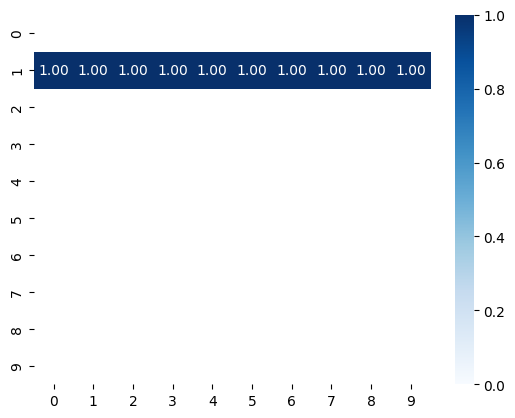

In [8]:
eval_metrics = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step
 accuracy: 0.6402  


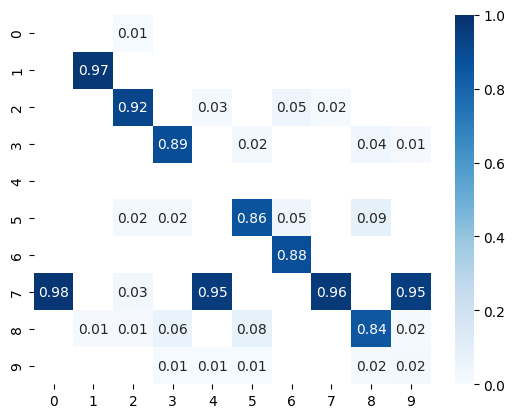

In [9]:
y_pred = model2.predict(test_images)
Accuracy(y_pred, test_labels, usage=Usage.multiClassification)
ConfusionMatrix(y_pred, test_labels, classes=[_ for _ in range(10)], usage=Usage.multiClassification)

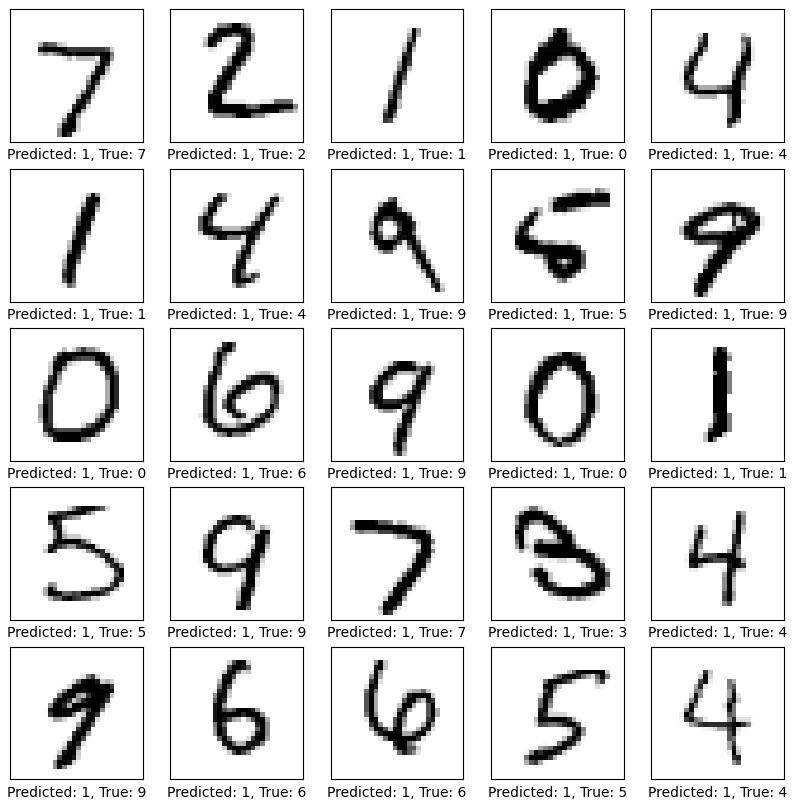

313/313 [==============================] - 0s 1ms/step


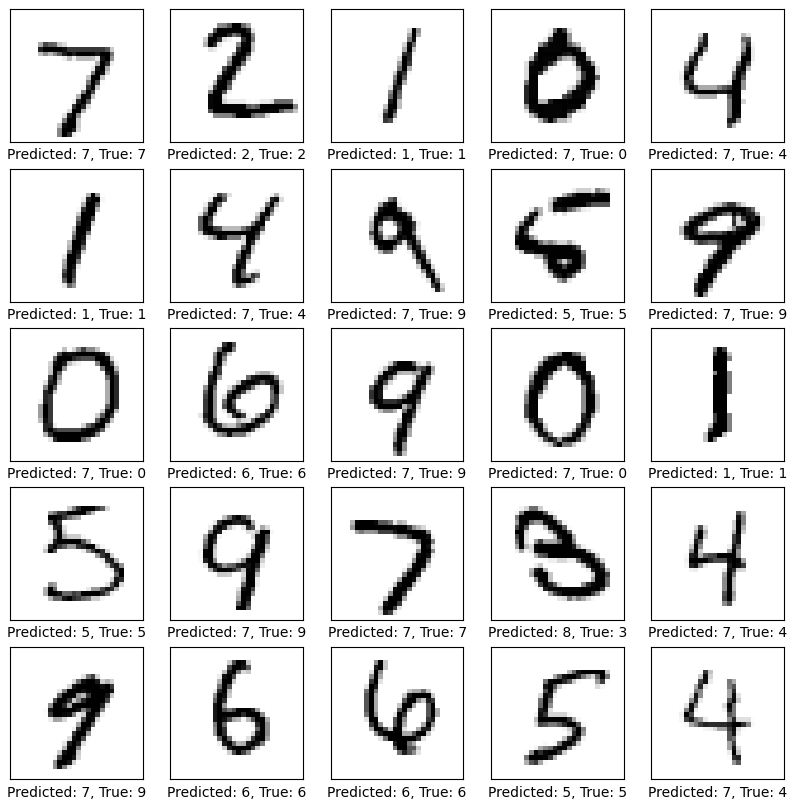

In [10]:
test(model1, test_images, test_labels)
test(model2, test_images, test_labels)